In [2]:
library(arrow)
library(cowplot)
library(data.table)
library(dplyr)
library(finalfit)
library(ggplot2)
library(ggridges)
library(ggsci)
library(lubridate)
library(readxl)
library(stringr)
library(tidyverse)
require(plyr)
theme_set(theme_bw(base_size=16))
options(repr.plot.width=15, repr.plot.height=15)



Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ───────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ──────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ d

In [18]:
count_exons <- ddply(df, .(EXOTIC_tissues_max), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("EXOTIC_tissues_max", "count")])
count_genes <- ddply(df, .(EXOTIC_tissues_max), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("EXOTIC_tissues_max", "count")])
merge(count_exons, count_genes, by='EXOTIC_tissues_max')
# count$genes <- count_genes$count

EXOTIC_tissues_max,count.x,count.y
<chr>,<int>,<int>
Adipose - Subcutaneous,30,9
Adipose - Visceral (Omentum),17,9
Adrenal Gland,58,28
Artery - Aorta,108,28
Artery - Coronary,24,5
Artery - Tibial,240,89
Bladder,197,106
Brain - Amygdala,170,75
Brain - Anterior cingulate cortex (BA24),74,32


In [10]:
df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_max_Rdata.xlsx')

df 

ERROR: Error in parse(text = x, srcfile = src): <text>:3:5: unexpected input
2: 
3: df >%> groupby(Tissue)
       ^


In [46]:
cutoff_sqtl <- read_excel("/gstock/EXOTIC/data/QTL/sQTL_cutoff_Rdata.xlsx")
cutoff_sqtl

Tissue,EXOTIC_max
<chr>,<dbl>
Adipose - Subcutaneous,0.9819987
Adipose - Visceral (Omentum),0.9245939
Adrenal Gland,0.9703809
Artery - Aorta,0.9383033
Artery - Coronary,0.9316118
Artery - Tibial,0.9716379
Brain - Amygdala,0.8954796
Brain - Anterior cingulate cortex (BA24),0.9494846
Brain - Caudate (basal ganglia),0.8681209


Tissue,count.x,count.y
<chr>,<int>,<int>
Adipose - Subcutaneous,5,27
Adipose - Visceral (Omentum),2,4
Adrenal Gland,4,4
Artery - Aorta,8,28
Artery - Coronary,5,22
Artery - Tibial,13,45
Bladder,10,19
Brain - Amygdala,5,9
Brain - Anterior cingulate cortex (BA24),6,27


Tissue,EXOTIC_up,symbol,MAP
<chr>,<dbl>,<chr>,<chr>


Warning message:
“Ignoring unknown parameters: height”
Warning message:
“Ignoring unknown parameters: height”
Picking joint bandwidth of 0.0194



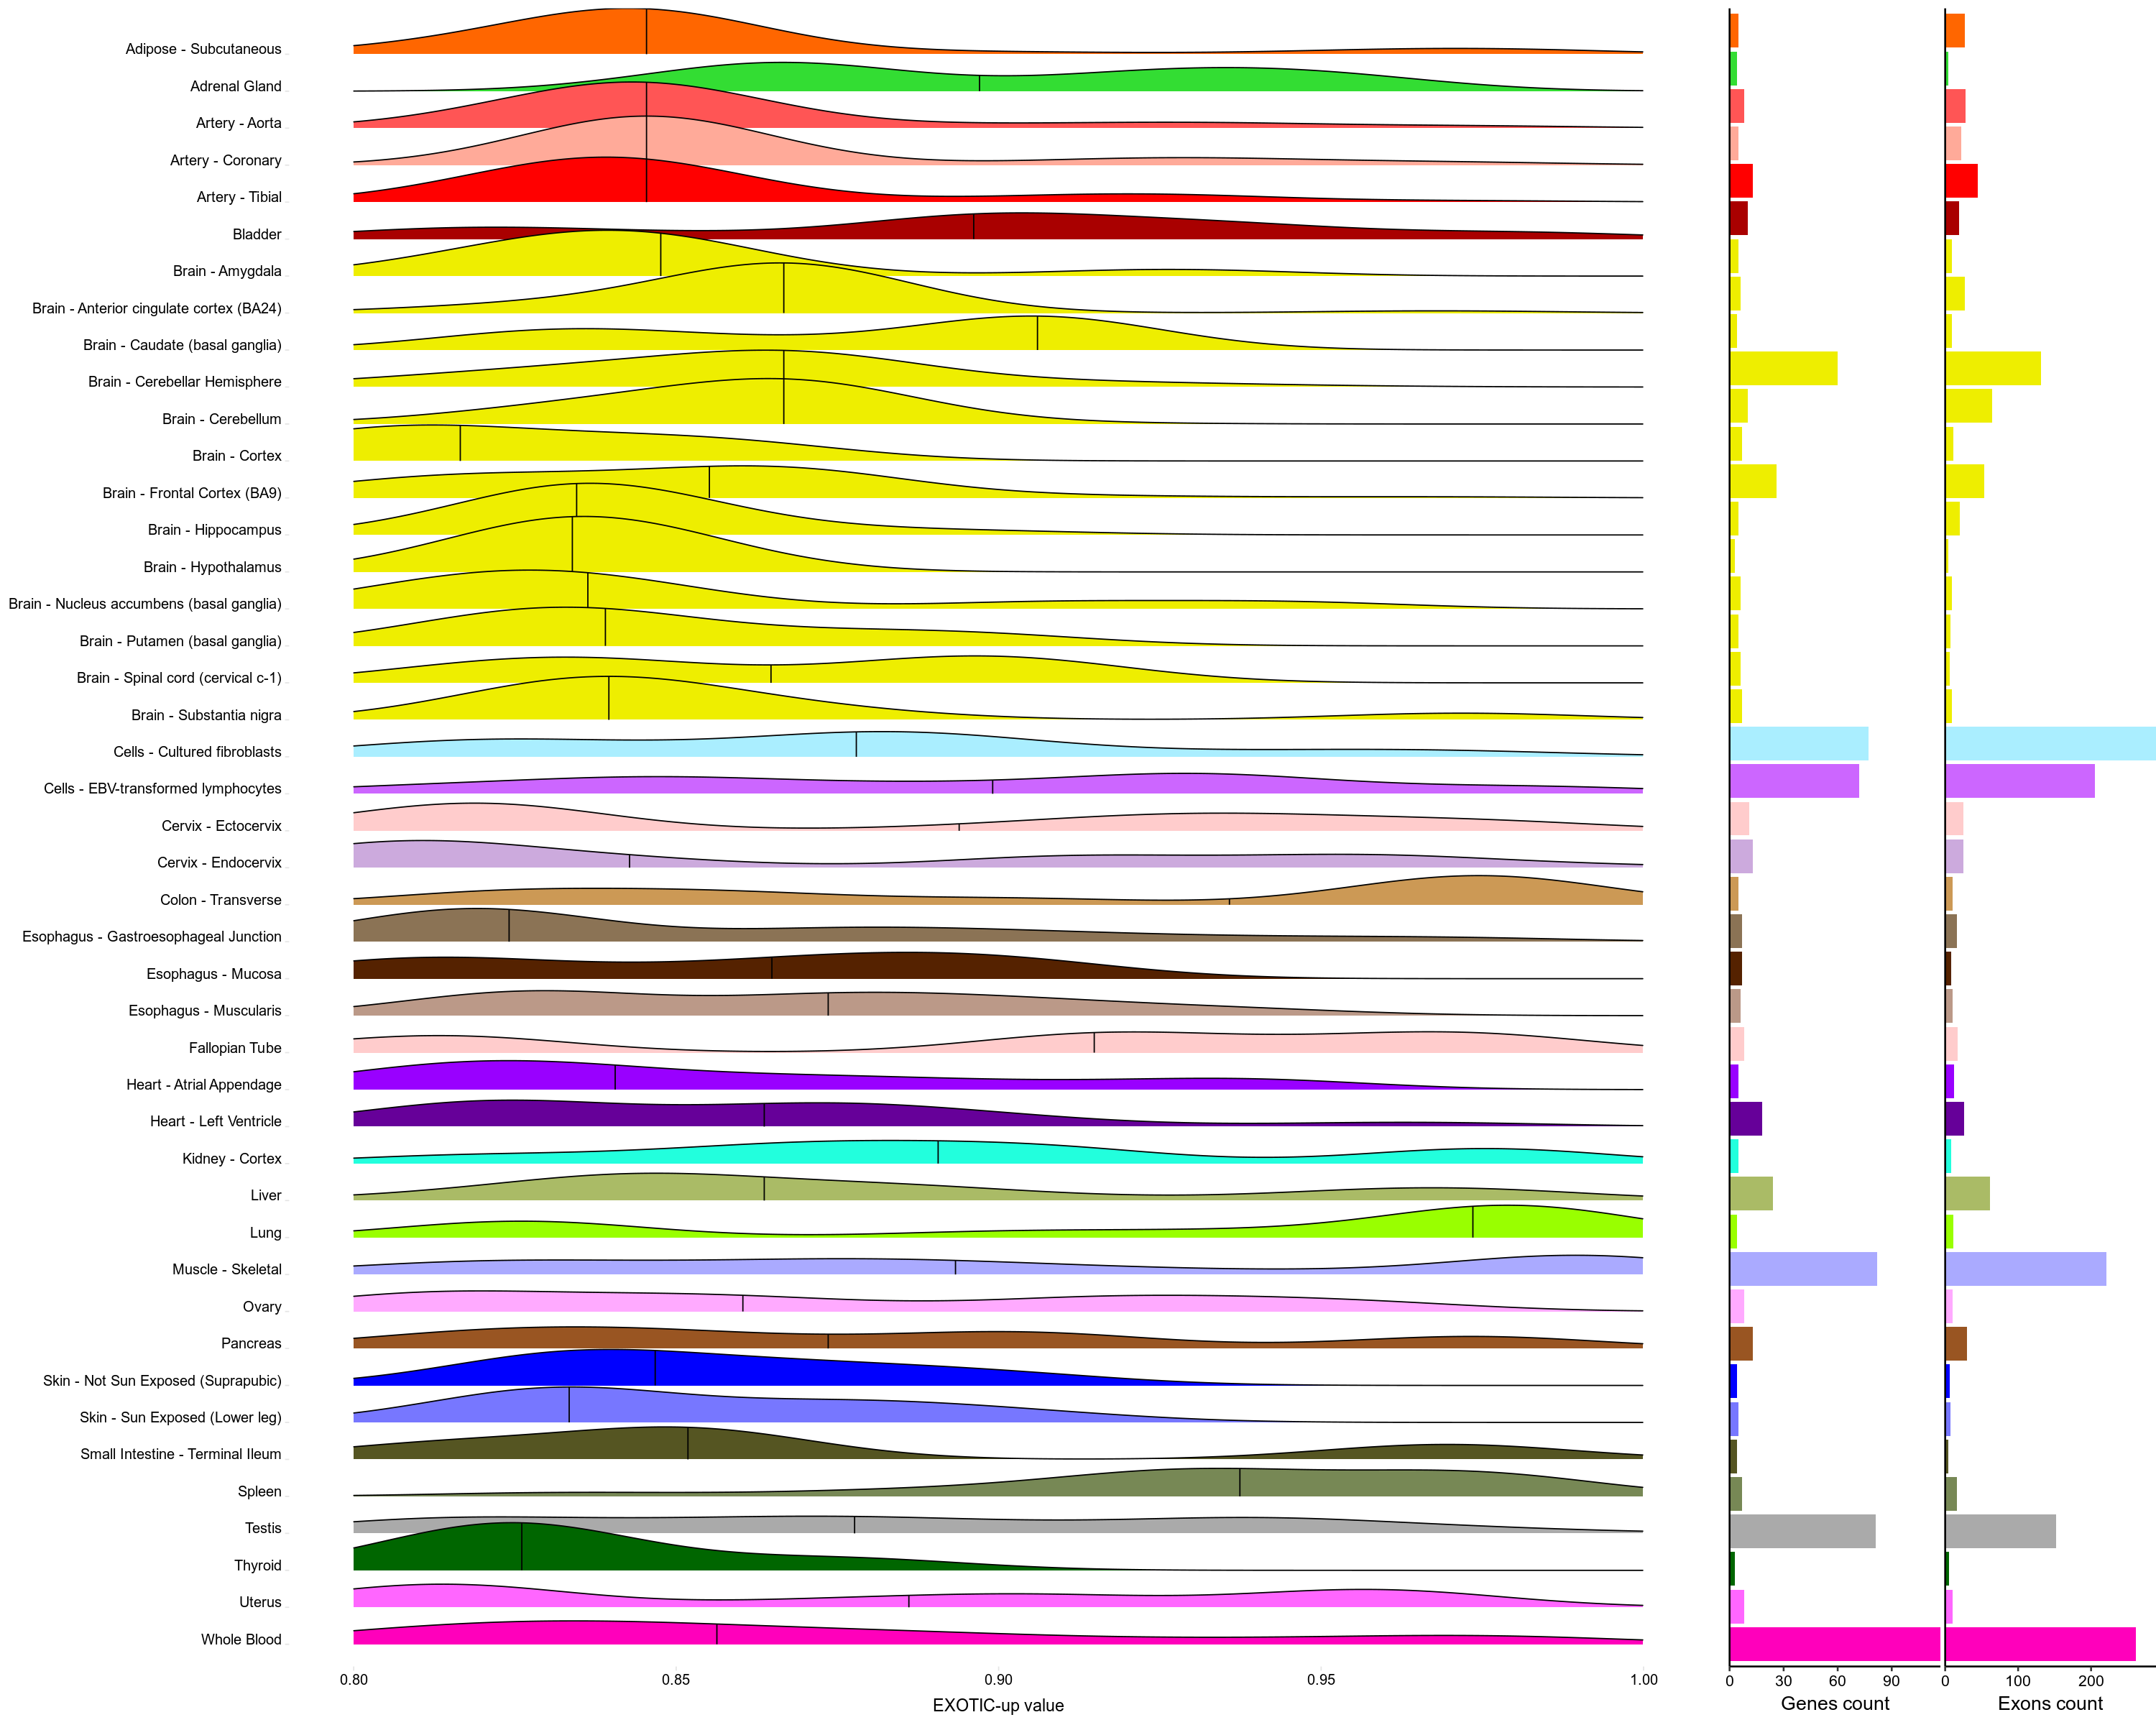

In [39]:
options(repr.plot.width=25, repr.plot.height=20)


df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_up_Rdata.xlsx')
df <- df[df$EXOTIC_up > 0.8, ]

colnames(df) <- c('Tissue', 'EXOTIC_up', 'symbol', 'MAP')

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')
count
count <- count[count$count.x > 2, ]

df = df[df$Tissue %in% count$Tissue ,]

df[df$Tissue == 'Minor Salivary Gland', ]

colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% df$Tissue ,]


# cutoff_sqtl <- read_excel("/gstock/EXOTIC/data/QTL/sQTL_cutoff_Rdata.xlsx")
# cutoff_sqtl = cutoff_sqtl[cutoff_sqtl$Tissue %in% count$Tissue ,]
# cutoff_sqtl <- merge(cutoff_sqtl, colors, all = TRUE)
# cutoff_sqtl[is.na(cutoff_sqtl)] <- 0
# cutoff_sqtl$ID <- seq(1, length(unique(cutoff_sqtl$Tissue)))
# cutoff_sqtl = cutoff_sqtl %>% arrange(Tissue)


h1 <- ggplot(df, aes(y=Tissue, x=EXOTIC_up, fill=Tissue), stat="identity") + scale_fill_manual(values=colors$Color) +  scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) +
    geom_density_ridges(scale = 1.5, quantile_lines = TRUE, quantiles = c(0.5), vline_size = 0.5, vline_color = "black") +
#     geom_segment(data = cutoff_sqtl, aes(x = EXOTIC_max, xend = EXOTIC_max, y = as.numeric(ID), yend = as.numeric(ID) + .9), color = "red") +  scale_y_discrete(limits = rev(unique(sort(cutoff_sqtl$Tissue)))) +
  xlim(0.8,1) +

#   theme(legend.position = "none")
  theme_minimal() +

  theme_ridges() + 
  theme(
    legend.position = "none",
#     axis.text = element_blank(),
    axis.title.y = element_blank(),
    panel.grid = element_blank(),
   panel.spacing = unit(0, "lines"),
#     plot.margin = unit(rep(4,20), "cm"),
#     text = element_text(size=12),
      axis.title.x = element_text(hjust = 0.5),
  ) + xlab("EXOTIC-up value")


h2 <- ggplot(count)+
      geom_bar(mapping = aes(y=Tissue, x=count.x, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(legend.position = "none", axis.ticks.y = element_blank(), axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) + 
    scale_x_continuous(expand = c(0,0)) + xlab("Genes count")


h3 <- ggplot(count)+
      geom_bar(mapping = aes(y=Tissue, x=count.y, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(legend.position = "none", axis.ticks.y = element_blank(), axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) + 
    scale_x_continuous(expand = c(0,0)) + xlab("Exons count")
#      facet_grid(.~Tissue, scales = "free_x")
plot <- plot_grid(plotlist=list(h1, h2, h3), align='h', ncol=3, rel_widths = c(8/10, 1/10, 1/10))
plot
# h1

Tissue,count.x,count.y
<chr>,<int>,<int>
Adipose - Subcutaneous,7,13
Adipose - Visceral (Omentum),4,10
Adrenal Gland,5,13
Artery - Aorta,8,18
Artery - Coronary,4,7
Artery - Tibial,11,21
Bladder,14,19
Brain - Amygdala,9,17
Brain - Anterior cingulate cortex (BA24),7,11


Tissue,EXOTIC_down,symbol,MAP
<chr>,<dbl>,<chr>,<chr>
Minor Salivary Gland,0.8914850,MELK_36657238-36657360,MELK
Minor Salivary Gland,0.8769652,SCG5_32976761-32976870,SCG5
Minor Salivary Gland,0.8350708,SLC30A3_27485680-27485774,SLC30A3
Minor Salivary Gland,0.8450116,TP73_3598930-3598994,TP73
Minor Salivary Gland,0.8450116,TP73_3599624-3599744,TP73


Warning message:
“Ignoring unknown parameters: height”
Warning message:
“Ignoring unknown parameters: height”
Picking joint bandwidth of 0.0185



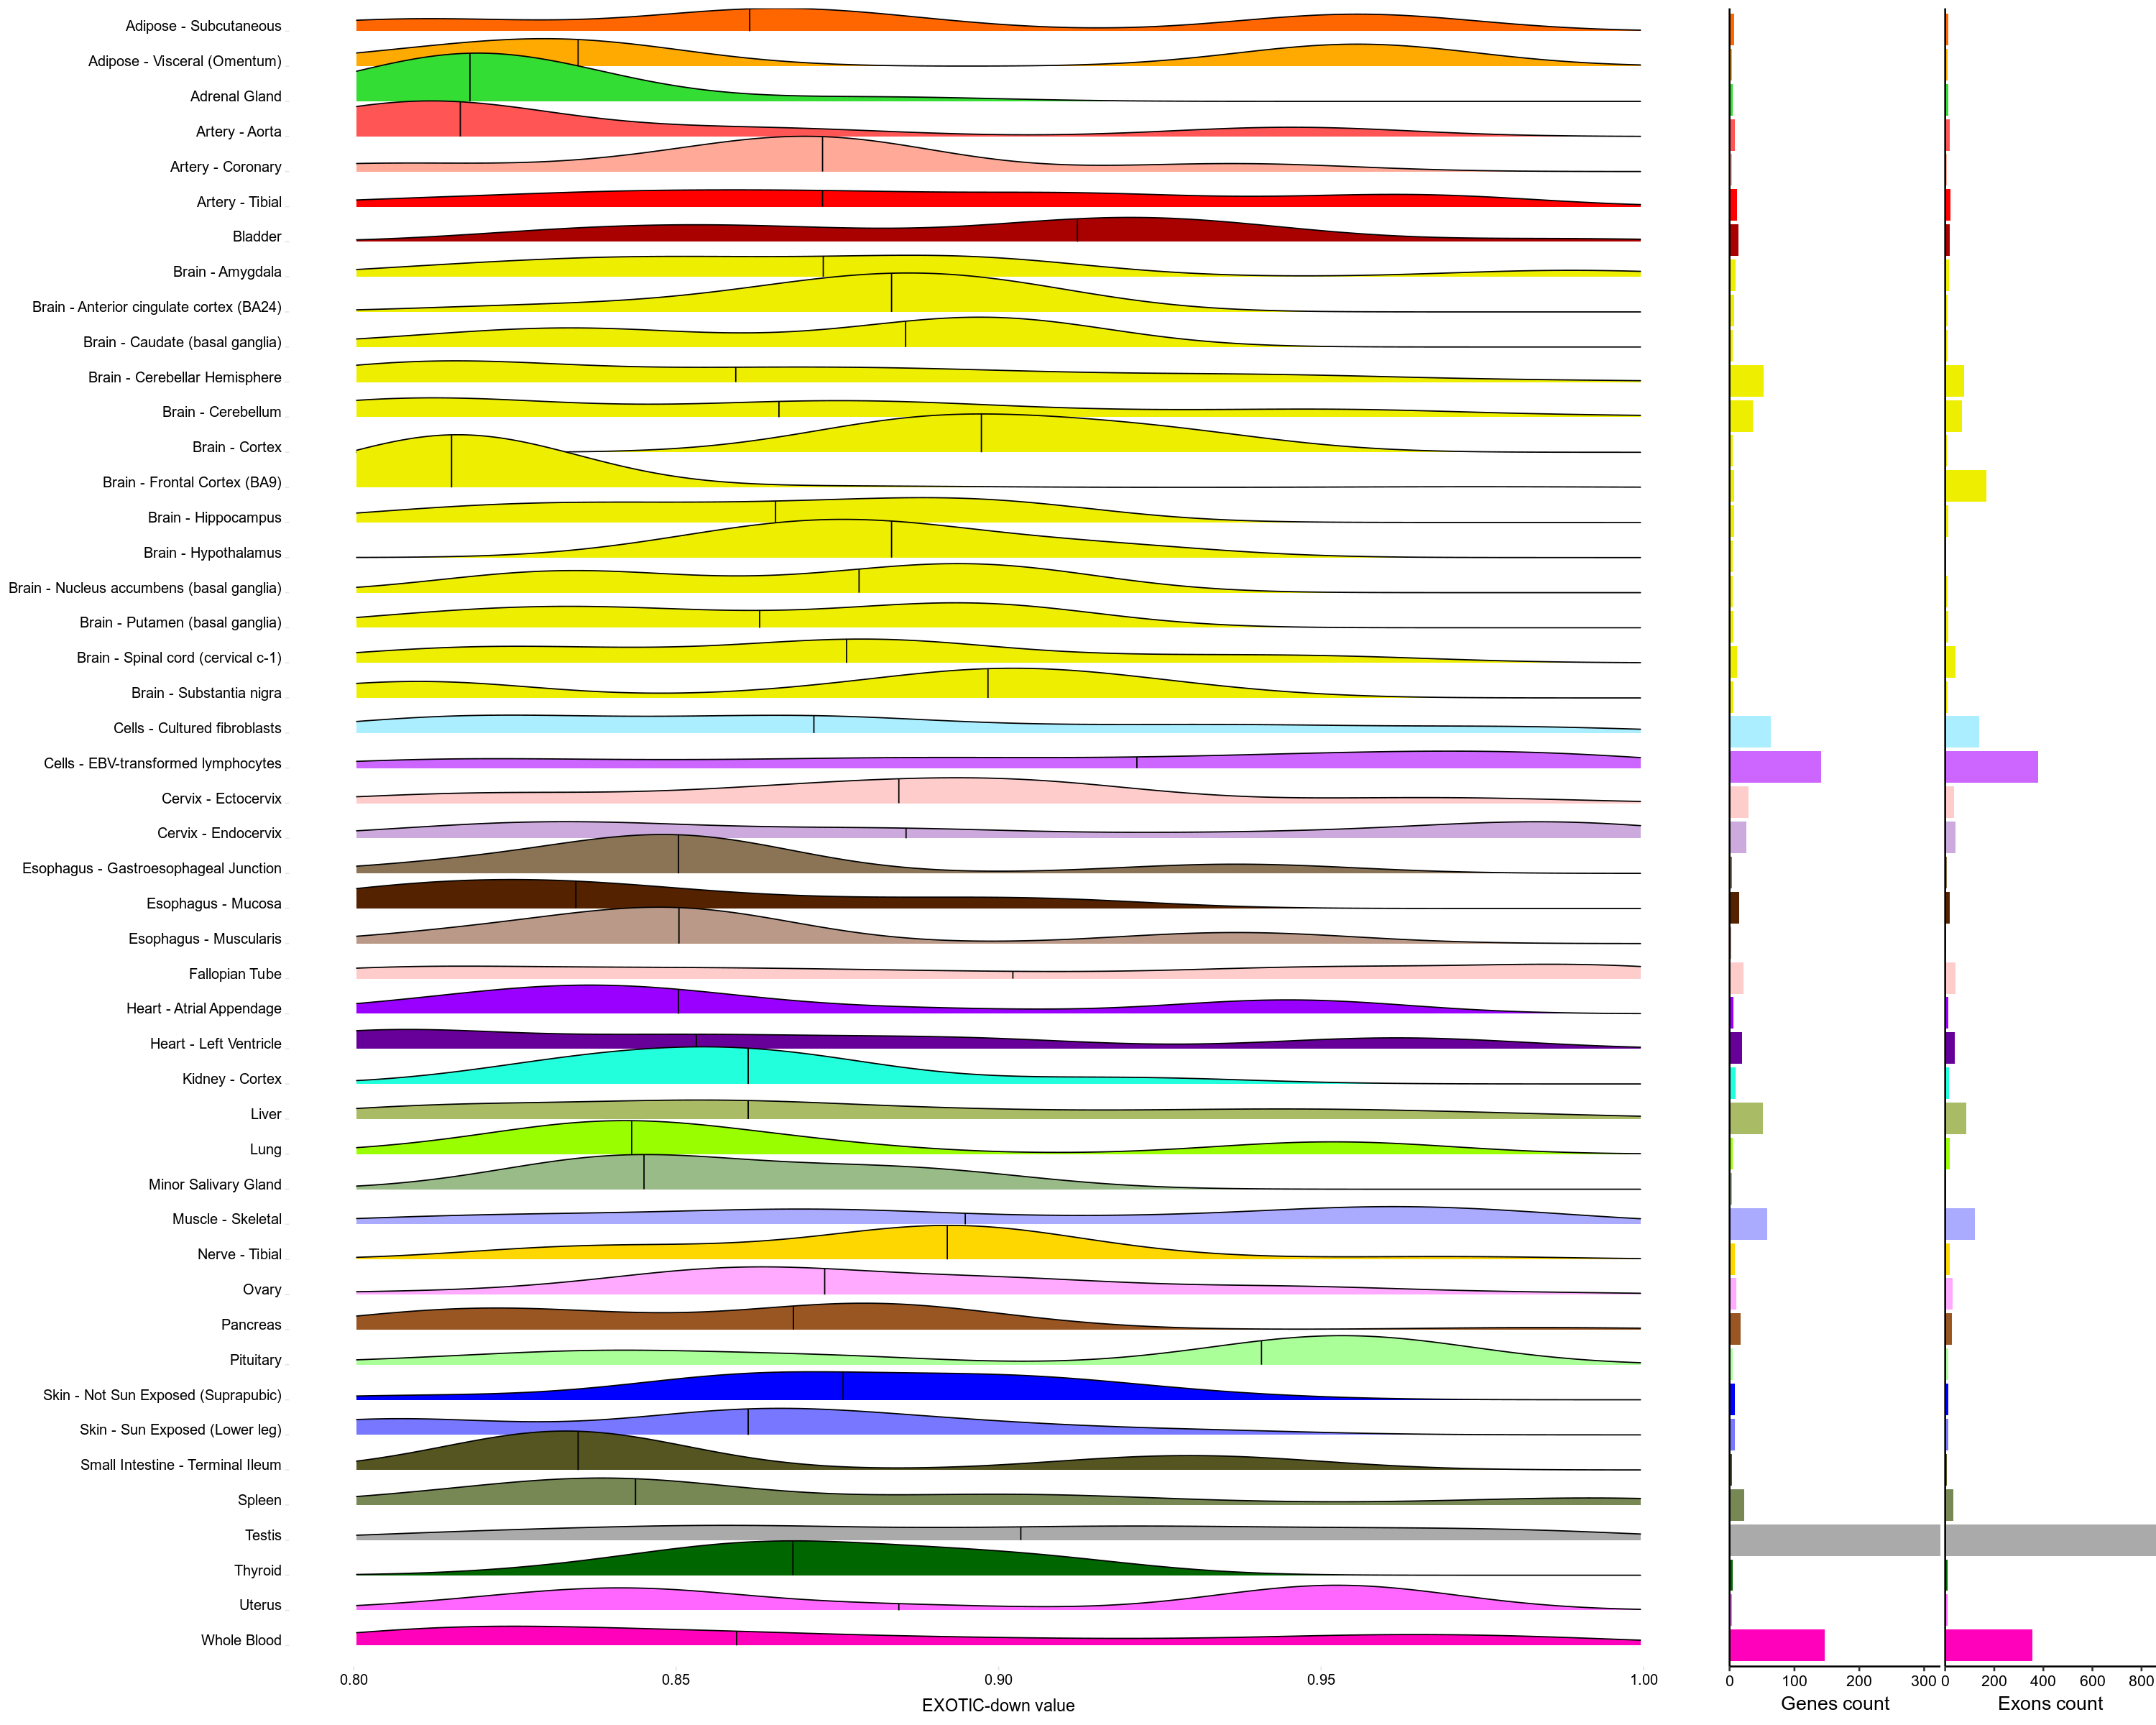

In [38]:
options(repr.plot.width=25, repr.plot.height=20)


df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_down_Rdata.xlsx')
df <- df[df$EXOTIC_down > 0.8, ]

colnames(df) <- c('Tissue', 'EXOTIC_down', 'symbol', 'MAP')

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')
count
count <- count[count$count.x > 2, ]

df = df[df$Tissue %in% count$Tissue ,]

df[df$Tissue == 'Minor Salivary Gland', ]

colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% df$Tissue ,]


# cutoff_sqtl <- read_excel("/gstock/EXOTIC/data/QTL/sQTL_cutoff_Rdata.xlsx")
# cutoff_sqtl = cutoff_sqtl[cutoff_sqtl$Tissue %in% count$Tissue ,]
# cutoff_sqtl <- merge(cutoff_sqtl, colors, all = TRUE)
# cutoff_sqtl[is.na(cutoff_sqtl)] <- 0
# cutoff_sqtl$ID <- seq(1, length(unique(cutoff_sqtl$Tissue)))
# cutoff_sqtl = cutoff_sqtl %>% arrange(Tissue)


h1 <- ggplot(df, aes(y=Tissue, x=EXOTIC_down, fill=Tissue), stat="identity") + scale_fill_manual(values=colors$Color) +  scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) +
    geom_density_ridges(scale = 1.5, quantile_lines = TRUE, quantiles = c(0.5), vline_size = 0.5, vline_color = "black") +
#     geom_segment(data = cutoff_sqtl, aes(x = EXOTIC_max, xend = EXOTIC_max, y = as.numeric(ID), yend = as.numeric(ID) + .9), color = "red") +  scale_y_discrete(limits = rev(unique(sort(cutoff_sqtl$Tissue)))) +
  xlim(0.8,1) +

#   theme(legend.position = "none")
  theme_minimal() +

  theme_ridges() + 
  theme(
    legend.position = "none",
#     axis.text = element_blank(),
    axis.title.y = element_blank(),
    panel.grid = element_blank(),
   panel.spacing = unit(0, "lines"),
#     plot.margin = unit(rep(4,20), "cm"),
#     text = element_text(size=12),
      axis.title.x = element_text(hjust = 0.5),
  ) + xlab("EXOTIC-down value")


h2 <- ggplot(count)+
      geom_bar(mapping = aes(y=Tissue, x=count.x, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(legend.position = "none", axis.ticks.y = element_blank(), axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) + 
    scale_x_continuous(expand = c(0,0)) + xlab("Genes count")


h3 <- ggplot(count)+
      geom_bar(mapping = aes(y=Tissue, x=count.y, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(legend.position = "none", axis.ticks.y = element_blank(), axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) + 
    scale_x_continuous(expand = c(0,0)) + xlab("Exons count")
#      facet_grid(.~Tissue, scales = "free_x")
plot <- plot_grid(plotlist=list(h1, h2, h3), align='h', ncol=3, rel_widths = c(8/10, 1/10, 1/10))
plot
# h1

Warning message:
“Ignoring unknown parameters: height”
Warning message:
“Ignoring unknown parameters: height”
Picking joint bandwidth of 0.00901



Tissue,EXOTIC_max,Abbrev,Color,Samples,ID
<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Adipose - Subcutaneous,0.9819987,ADPSBQ,#FF6600,581,1
Adipose - Visceral (Omentum),0.9245939,ADPVSC,#FFAA00,469,2
Adrenal Gland,0.9703809,ADRNLG,#33DD33,233,3
Artery - Aorta,0.9383033,ARTAORT,#FF5555,387,4
Artery - Coronary,0.9316118,ARTCRN,#FFAA99,213,5
Artery - Tibial,0.9716379,ARTTBL,#FF0000,584,6
Bladder,0.0000000,BLADDER,#A90000,0,7
Brain - Amygdala,0.8954796,BRNAMY,#EEEE00,129,8
Brain - Anterior cingulate cortex (BA24),0.9494846,BRNACC,#EEEE00,147,9


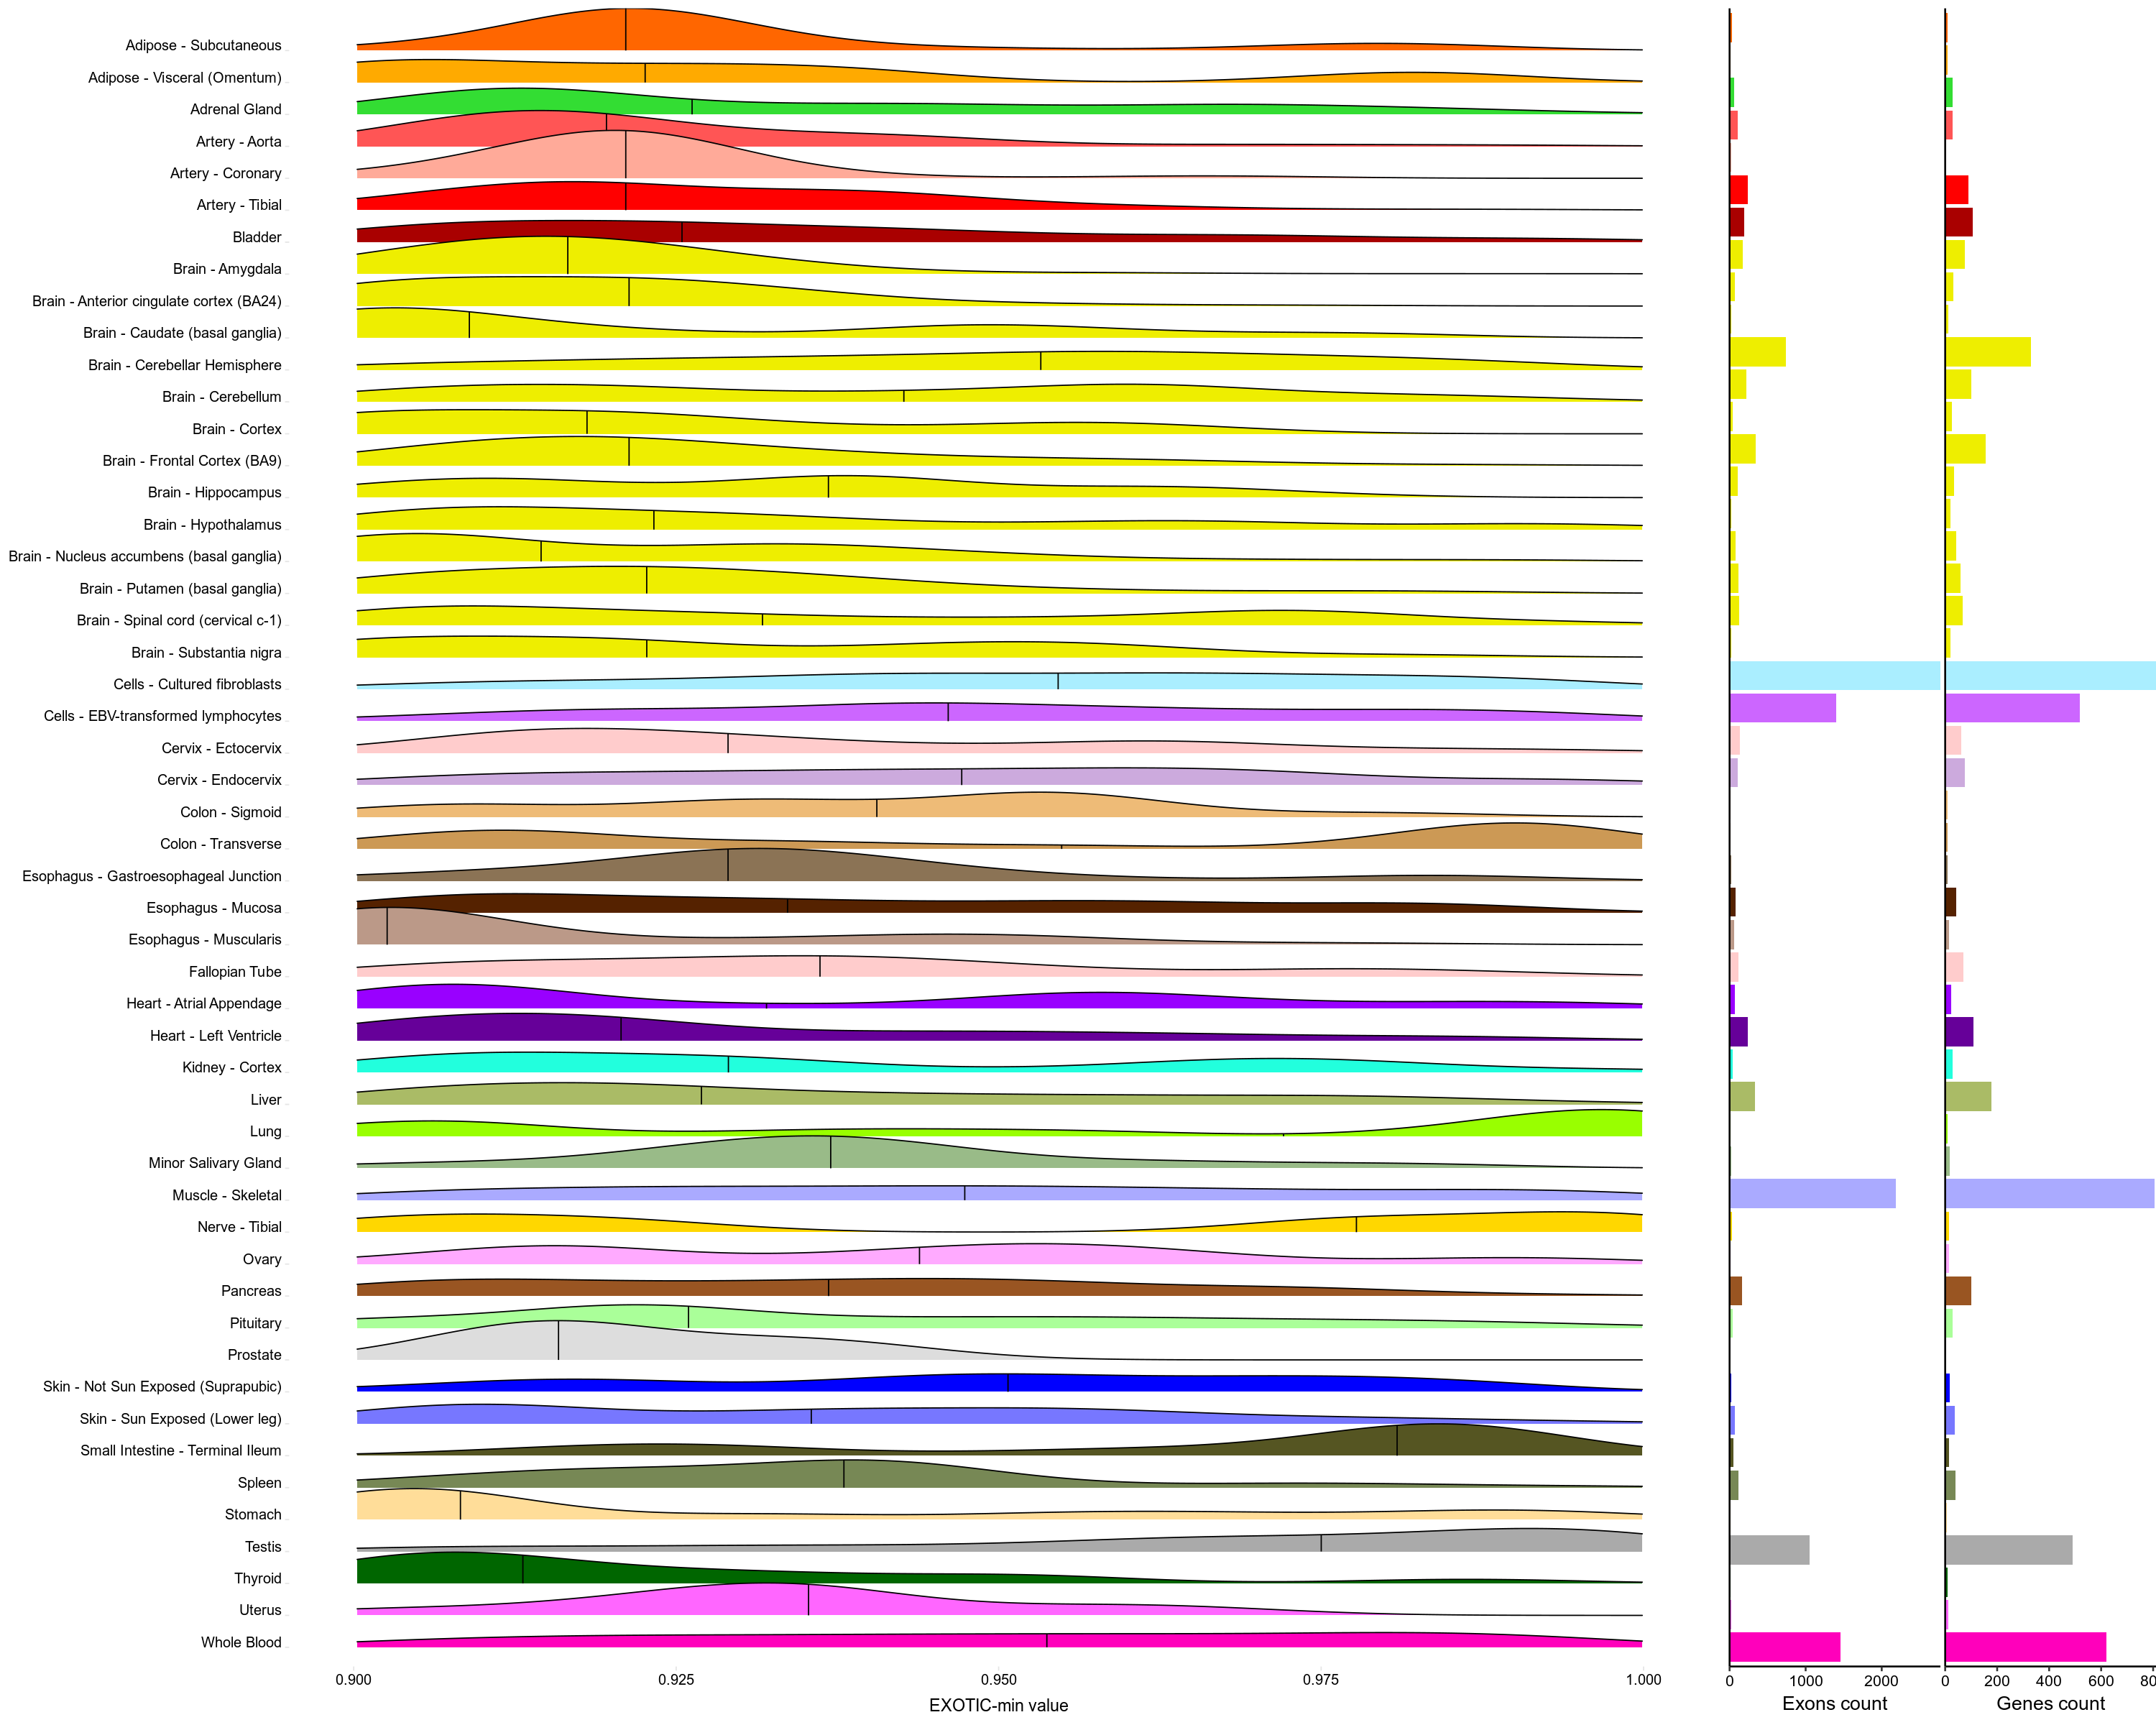

In [85]:
options(repr.plot.width=25, repr.plot.height=20)


df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_max_Rdata.xlsx')

colnames(df) <- c('Tissue', 'EXOTIC_max', 'symbol', 'MAP')

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')
count <- count[count$count.x > 2, ]

df = df[df$Tissue %in% count$Tissue ,]


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% df$Tissue ,]


cutoff_sqtl <- read_excel("/gstock/EXOTIC/data/QTL/sQTL_cutoff_Rdata.xlsx")
cutoff_sqtl = cutoff_sqtl[cutoff_sqtl$Tissue %in% count$Tissue ,]
cutoff_sqtl <- merge(cutoff_sqtl, colors, all = TRUE)
cutoff_sqtl[is.na(cutoff_sqtl)] <- 0
cutoff_sqtl$ID <- seq(1, length(unique(cutoff_sqtl$Tissue)))
cutoff_sqtl = cutoff_sqtl %>% arrange(Tissue)


h1 <- ggplot(df, aes(y=Tissue, x=EXOTIC_max, fill=Tissue), stat="identity") + scale_fill_manual(values=colors$Color) +  scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) +
    geom_density_ridges(scale = 1.5, quantile_lines = TRUE, quantiles = c(0.5), vline_size = 0.5, vline_color = "black") +
#     geom_segment(data = cutoff_sqtl, aes(x = EXOTIC_max, xend = EXOTIC_max, y = as.numeric(ID), yend = as.numeric(ID) + .9), color = "red") +  scale_y_discrete(limits = rev(unique(sort(cutoff_sqtl$Tissue)))) +
  xlim(0.9,1) +

#   theme(legend.position = "none")
  theme_minimal() +

  theme_ridges() + 
  theme(
    legend.position = "none",
#     axis.text = element_blank(),
    axis.title.y = element_blank(),
    panel.grid = element_blank(),
   panel.spacing = unit(0, "lines"),
#     plot.margin = unit(rep(4,20), "cm"),
#     text = element_text(size=12),
      axis.title.x = element_text(hjust = 0.5),
  ) + xlab("EXOTIC-min value")


h2 <- ggplot(count)+
      geom_bar(mapping = aes(y=Tissue, x=count.x, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(legend.position = "none", axis.ticks.y = element_blank(), axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) + 
    scale_x_continuous(expand = c(0,0)) + xlab("Exons count")


h3 <- ggplot(count)+
      geom_bar(mapping = aes(y=Tissue, x=count.y, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(legend.position = "none", axis.ticks.y = element_blank(), axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) + 
    scale_x_continuous(expand = c(0,0)) + xlab("Genes count")
#      facet_grid(.~Tissue, scales = "free_x")
plot <- plot_grid(plotlist=list(h1, h2, h3), align='h', ncol=3, rel_widths = c(8/10, 1/10, 1/10))
plot
# h2

In [24]:
head(df)

EXOTIC_tissues_max,EXOTIC_max,symbol,MAP
<chr>,<dbl>,<chr>,<chr>
Uterus,0.9311021,A2ML1,A2ML1_8997768-8997770
Cells - Cultured fibroblasts,0.9041248,A2M,A2M_9264755-9264787
Cells - Cultured fibroblasts,0.9041248,A2M,A2M_9264973-9265102
Cells - Cultured fibroblasts,0.9041248,A2M,A2M_9265956-9266139
Cells - Cultured fibroblasts,0.9041248,A2M,A2M_9268360-9268445
Muscle - Skeletal,0.9150034,AACS,AACS_125609448-125609570


In [31]:
sort(unique(df$Tissue))

[1] "Adipose - Subcutaneous"                   
 [2] "Adipose - Visceral (Omentum)"             
 [3] "Adrenal Gland"                            
 [4] "Artery - Aorta"                           
 [5] "Artery - Coronary"                        
 [6] "Artery - Tibial"                          
 [7] "Bladder"                                  
 [8] "Brain - Amygdala"                         
 [9] "Brain - Anterior cingulate cortex (BA24)" 
[10] "Brain - Caudate (basal ganglia)"          
[11] "Brain - Cerebellar Hemisphere"            
[12] "Brain - Cerebellum"                       
[13] "Brain - Cortex"                           
[14] "Brain - Frontal Cortex (BA9)"             
[15] "Brain - Hippocampus"                      
[16] "Brain - Hypothalamus"                     
[17] "Brain - Nucleus accumbens (basal ganglia)"
[18] "Brain - Putamen (basal ganglia)"          
[19] "Brain - Spinal cord (cervical c-1)"       
[20] "Brain - Substantia nigra"                 
[21] "Cells - Cultured fibroblasts"             
[22] "Cells - EBV-transformed lymphocytes"      
[23] "Cervix - Ectocervix"                      
[24] "Cervix - Endocervix"                      
[25] "Colon - Sigmoid"                          
[26] "Colon - Transverse"                       
[27] "Esophagus - Gastroesophageal Junction"    
[28] "Esophagus - Mucosa"                       
[29] "Esophagus - Muscularis"                   
[30] "Fallopian Tube"                           
[31] "Heart - Atrial Appendage"                 
[32] "Heart - Left Ventricle"                   
[33] "Kidney - Cortex"                          
[34] "Liver"                                    
[35] "Lung"                                     
[36] "Minor Salivary Gland"                     
[37] "Muscle - Skeletal"                        
[38] "Nerve - Tibial"                           
[39] "Ovary"                                    
[40] "Pancreas"                                 
[41] "Pituitary"                                
[42] "Prostate"                                 
[43] "Skin - Not Sun Exposed (Suprapubic)"      
[44] "Skin - Sun Exposed (Lower leg)"           
[45] "Small Intestine - Terminal Ileum"         
[46] "Spleen"                                   
[47] "Stomach"                                  
[48] "Testis"                                   
[49] "Thyroid"                                  
[50] "Uterus"                                   
[51] "Vagina"                                   
[52] "Whole Blood"

In [34]:
df[df$Tissue == 'Breast - Mammary Tissue', ]

Tissue,EXOTIC_max,symbol,MAP
<chr>,<dbl>,<chr>,<chr>
Breast - Mammary Tissue,0.05081106,JAKMIP1,JAKMIP1_6107200-6107694


Warning message:
“Ignoring unknown parameters: height”
Warning message:
“Ignoring unknown parameters: height”
Picking joint bandwidth of 0.00821



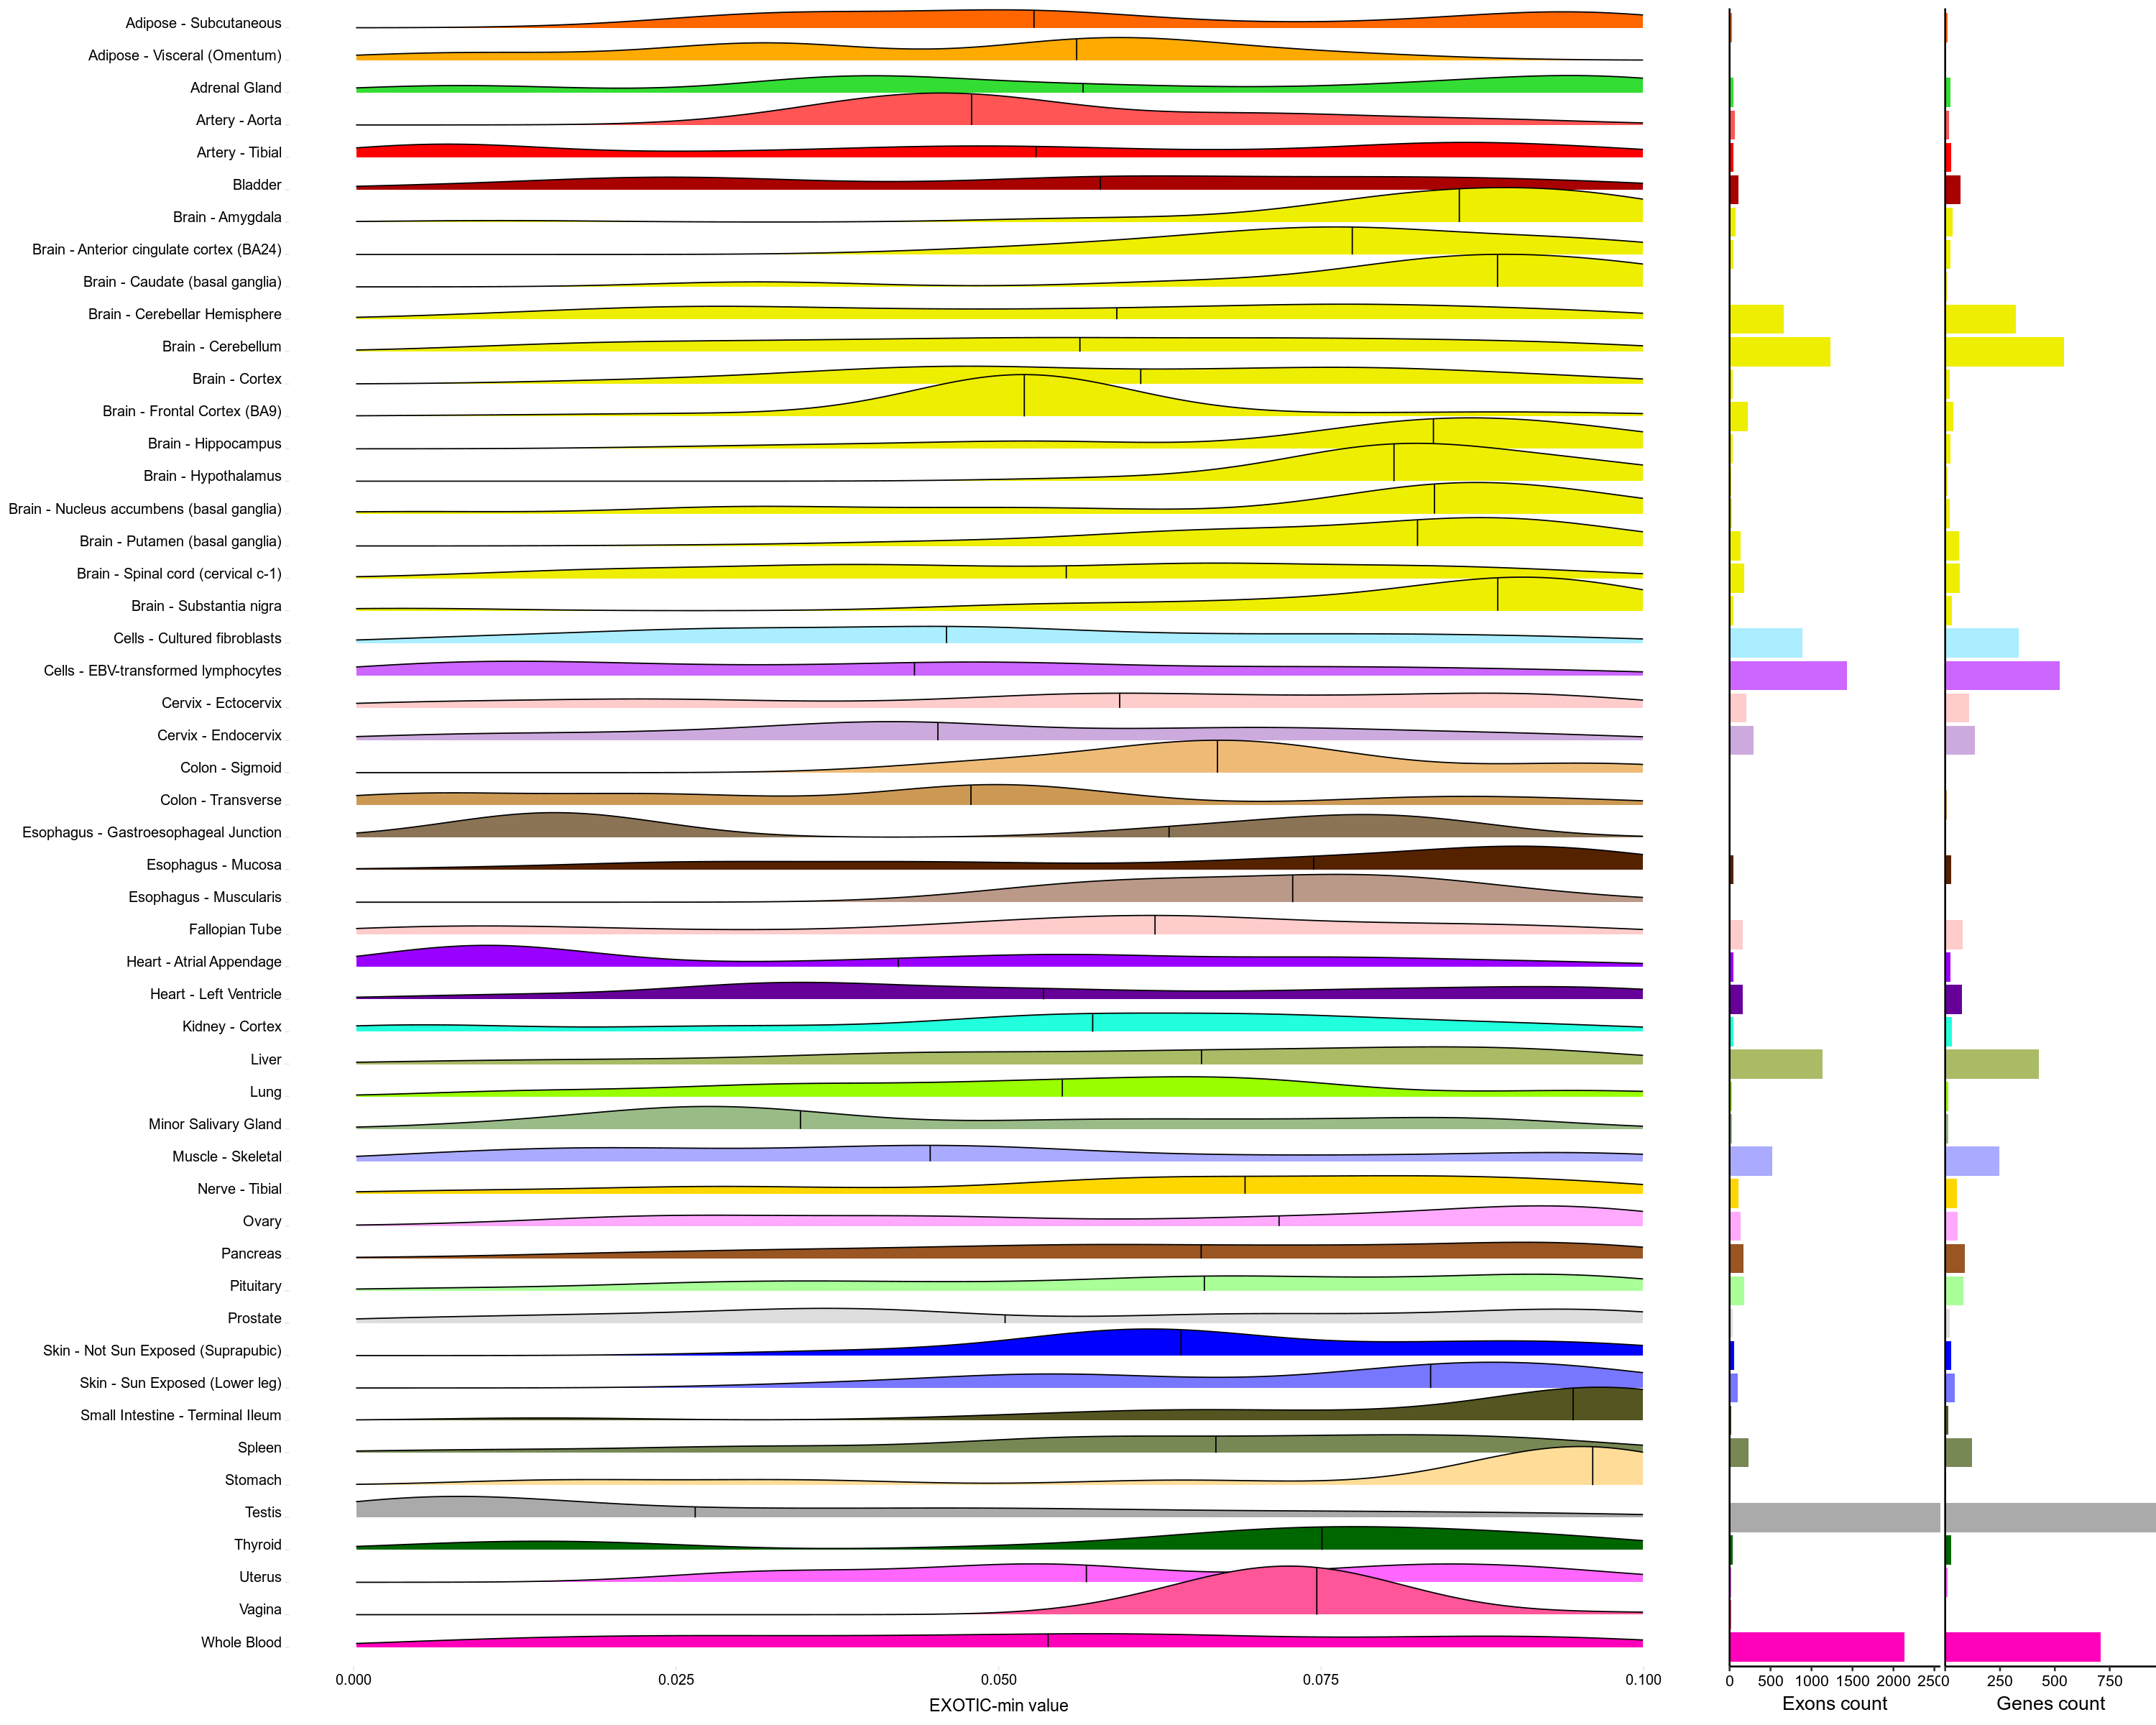

In [40]:
options(repr.plot.width=25, repr.plot.height=20)


df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_min_Rdata.xlsx')
colnames(df) <- c('Tissue', 'EXOTIC_max', 'symbol', 'MAP')
# df <- filter(df, Tissue != "Breast - Mammary Tissue")

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')

count <- count[count$count.x > 2, ]
df = df[df$Tissue %in% count$Tissue ,]



colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% df$Tissue ,]



h1 <- ggplot(df, aes(y=Tissue, x=EXOTIC_max, fill=Tissue), stat="identity") + scale_fill_manual(values=colors$Color) +  scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) +
  geom_density_ridges(scale = 1.5, quantile_lines = TRUE, quantiles = c(0.5), vline_size = 0.5, vline_color = "black")+
  xlim(0,0.1) +

#   theme(legend.position = "none")
  theme_minimal() +

  theme_ridges() + 
  theme(
    legend.position = "none",
#     axis.text = element_blank(),
    axis.title.y = element_blank(),
    panel.grid = element_blank(),
   panel.spacing = unit(0, "lines"),
#     plot.margin = unit(rep(4,20), "cm"),
#     text = element_text(size=12),
      axis.title.x = element_text(hjust = 0.5),
  ) + xlab("EXOTIC-min value")


h2 <- ggplot(count)+
      geom_bar(mapping = aes(y=Tissue, x=count.x, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(legend.position = "none", axis.ticks.y = element_blank(), axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) + 
    scale_x_continuous(expand = c(0,0)) + xlab("Exons count")


h3 <- ggplot(count)+
      geom_bar(mapping = aes(y=Tissue, x=count.y, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(legend.position = "none", axis.ticks.y = element_blank(), axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) + 
    scale_x_continuous(expand = c(0,0)) + xlab("Genes count")
#      facet_grid(.~Tissue, scales = "free_x")
plot <- plot_grid(plotlist=list(h1, h2, h3), align='h', ncol=3, rel_widths = c(8/10, 1/10, 1/10))
plot
# h2